In [2]:
import numpy as np
import pandas as pd

def read_idx(filename):
    with open(filename, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>i4')[0]
        num_dimensions = (magic & 0xFF)
        shape = np.frombuffer(f.read(num_dimensions * 4), dtype='>i4')
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(shape)

# Paths to the MNIST files
images_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-images.idx3-ubyte"
labels_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-labels.idx1-ubyte"

# Read the images and labels
images = read_idx(images_path)
labels = read_idx(labels_path)

# Convert to DataFrame
images_df = pd.DataFrame(images.reshape(images.shape[0], -1))  # Flatten the images
labels_df = pd.DataFrame(labels)

# Combine images and labels into one DataFrame
mnist_df = pd.concat([labels_df, images_df], axis=1)
mnist_df.columns = ['Label'] + [f'Pixel_{i}' for i in range(images_df.shape[1])]



In [3]:
mnist_df
pixels = pd.DataFrame(mnist_df.data)
labels = pd.DataFrame(mnist_df.target)

AttributeError: 'DataFrame' object has no attribute 'data'

In [3]:
pixels.loc[0].values

NameError: name 'pixels' is not defined

In [4]:
labels.iloc[0].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size = 1/7.0)

NameError: name 'mnist' is not defined

In [6]:
X_test.shape

NameError: name 'X_test' is not defined

In [241]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [243]:
y_pred = model.predict(X_test)


In [244]:
model.score(X_test,y_test)

0.9708

In [245]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9708

In [246]:
# correct labels fr the irst 5 values

y_test.head()

69627    6
14341    9
41662    2
17144    7
20928    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [248]:
y_predicted = model.predict( np.array(X_test.iloc[0]).reshape(1,-1))


C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


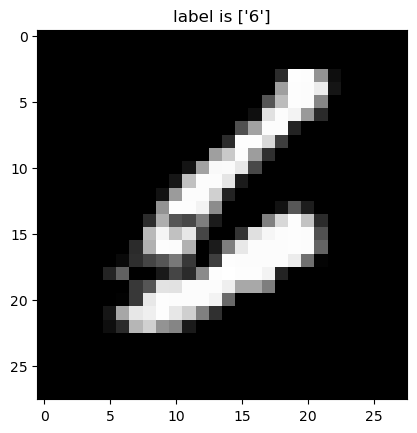

In [249]:
# testing the model using the test set
label = y_predicted
pixel = X_test.iloc[0]
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')

In [250]:
import pickle

In [251]:
filename = 'digit_recognition'
with open(filename,'wb') as file:
    pickle.dump(model,file)

In [252]:
# prediction function

def Predict(value):
    y_predicted = model.predict(value.reshape(1,-1))
    return y_predicted

In [253]:
# function to convert entered decimal number to grayscale

import numpy as np
from PIL import Image, ImageDraw, ImageFont

def digit_to_grayscale_array(digit):
    """Convert a digit from 1 to 9 into a flattened grayscale image array."""
    if not (1 <= digit <= 9):
        raise ValueError("Input must be a decimal number between 1 and 9.")

    # Create a blank black image
    img = Image.new('L', (28, 28), color=0)  # 'L' mode for grayscale
    draw = ImageDraw.Draw(img)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 24)  # Adjust the font path if needed
    except IOError:
        font = ImageFont.load_default()

    # Calculate position to center the digit
    text = str(digit)
    text_width, text_height = draw.textsize(text, font=font)
    position = ((28 - text_width) // 2, (28 - text_height) // 2)

    # Draw the digit on the image in white
    draw.text(position, text, fill=255, font=font)  # Fill with white

    # Convert image to numpy array and flatten
    image_array = np.array(img)
    flattened_array = image_array.flatten()

    return flattened_array


In [256]:
# function to recognize the entered digit

def Recognize_digit(digit):
    gray_scale_number = digit_to_grayscale_array(digit)
    predicted = Predict(gray_scale_number)
    return predicted,gray_scale_number
    

Enter the number between 1 - 9: 9
Prdicted number: ['9']


C:\Users\IDRESS COMPUTERS\AppData\Local\Temp\ipykernel_7612\2612696962.py:23: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


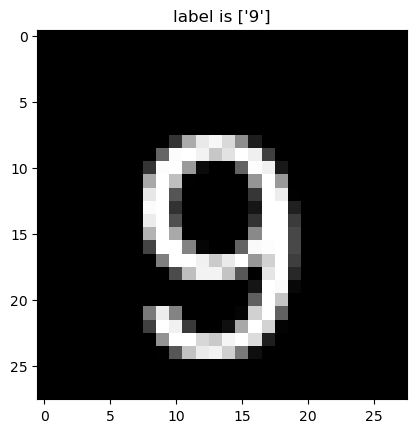

In [259]:
#running the model with new inputed values

number = int(input('Enter the number between 1 - 9: '))
predicted,gray_scale_number = Recognize_digit(number)
print(f'Prdicted number: {predicted}')
label = predicted
pixel = gray_scale_number
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')

In [2]:
pip install tensorflow keras opencv-python albumentations

     ------------------------------------ 331.7/331.7 MB 823.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv-python (from versions: none)
ERROR: No matching distribution found for opencv-python


In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from keras import _tf_keras as _tf_keras

ModuleNotFoundError: No module named 'tensorflow'